# Imports

In [1]:
import palantir
import scanpy as sc
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from numba.core.errors import NumbaDeprecationWarning

warnings.filterwarnings(action="ignore", category=NumbaDeprecationWarning)
warnings.filterwarnings(
    action="ignore", module="scanpy", message="No data for colormapping"
)
%matplotlib inline

In [2]:
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

/tmp/ipykernel_188/2174054843.py:8: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


# Loading Dataset

In [3]:
%%R
data <- readRDS("mesoderm-development_loh (1).rds")
class(data)

[1] "dynwrap::with_cell_waypoints" "dynwrap::with_prior"         
[3] "dynwrap::with_expression"     "dynwrap::with_trajectory"    
[5] "dynwrap::with_grouping"       "dynwrap::data_wrapper"       
[7] "list"                        


In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


In [4]:
%%R
print(str(data))

List of 21
 $ id                   : chr "real/gold/mesoderm-development_loh"
 $ cell_ids             : chr [1:504] "SRR3952323" "SRR3952325" "SRR3952326" "SRR3952327" ...
 $ cell_info            :'data.frame':	504 obs. of  4 variables:
  ..$ cell_id     : chr [1:504] "SRR3952323" "SRR3952325" "SRR3952326" "SRR3952327" ...
  ..$ Run         : chr [1:504] "SRR3952323" "SRR3952325" "SRR3952326" "SRR3952327" ...
  ..$ LibraryName : chr [1:504] "H7hESC" "H7hESC" "H7hESC" "H7hESC" ...
  ..$ milestone_id: chr [1:504] "H7hESC" "H7hESC" "H7hESC" "H7hESC" ...
 $ source               : chr "real/gold"
 $ normalisation_info   :List of 3
  ..$ has_spike          : logi TRUE
  ..$ has_mito           : logi TRUE
  ..$ normalisation_steps:Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	6 obs. of  3 variables:
  .. ..$ type     : chr [1:6] "original" "cell_quality_filtering" "feature_expression_filtering" "normalisation" ...
  .. ..$ nfeatures: int [1:6] 58480 58480 36347 36347 8772 8772
  .. ..$ ncells   :

In [5]:
%%R
print(data$prior_information)

$start_milestones
[1] "H7hESC"

$start_id
[1] "SRR3952356"

$end_milestones
[1] "H7_derived_D5CntrlDrmmtm" "H7_derived_Sclrtm"       
[3] "H7_derived_D3GARPpCrdcM" 

$end_id
[1] "SRR3952713" "SRR3952690" "SRR3952891"

$groups_id
       cell_id                 group_id
1   SRR3952323                   H7hESC
2   SRR3952325                   H7hESC
3   SRR3952326                   H7hESC
4   SRR3952327                   H7hESC
5   SRR3952328                   H7hESC
6   SRR3952329                   H7hESC
7   SRR3952330                   H7hESC
8   SRR3952331                   H7hESC
9   SRR3952337                   H7hESC
10  SRR3952341                   H7hESC
11  SRR3952342                   H7hESC
12  SRR3952343                   H7hESC
13  SRR3952344                   H7hESC
14  SRR3952345                   H7hESC
15  SRR3952347                   H7hESC
16  SRR3952348                   H7hESC
17  SRR3952349                   H7hESC
18  SRR3952350                   H7hESC
19  SRR3952

403 SRR3952812         H7_derived_D2LtM
404 SRR3952813         H7_derived_D2LtM
405 SRR3952814         H7_derived_D2LtM
406 SRR3952815         H7_derived_D2LtM
407 SRR3952816         H7_derived_D2LtM
408 SRR3952817         H7_derived_D2LtM
409 SRR3952818         H7_derived_D2LtM
410 SRR3952819         H7_derived_D2LtM
411 SRR3952820         H7_derived_D2LtM
412 SRR3952821         H7_derived_D2LtM
413 SRR3952822         H7_derived_D2LtM
414 SRR3952823         H7_derived_D2LtM
415 SRR3952825         H7_derived_D2LtM
416 SRR3952827         H7_derived_D2LtM
417 SRR3952829         H7_derived_D2LtM
418 SRR3952830         H7_derived_D2LtM
419 SRR3952831         H7_derived_D2LtM
420 SRR3952832         H7_derived_D2LtM
421 SRR3952885  H7_dreived_D2.25_Smtmrs
422 SRR3952886  H7_dreived_D2.25_Smtmrs
423 SRR3952887  H7_dreived_D2.25_Smtmrs
424 SRR3952889  H7_dreived_D2.25_Smtmrs
425 SRR3952890  H7_dreived_D2.25_Smtmrs
426 SRR3952891  H7_dreived_D2.25_Smtmrs
427 SRR3952892  H7_dreived_D2.25_Smtmrs


 [593] "SLC6A6"          "UCKL1"           "UNG"             "RASGEF1B"       
 [597] "NANOGP8"         "SLC1A5"          "DDAH1"           "PSMB8"          
 [601] "AKAP2"           "TUBA1C"          "TAGLN"           "ENO2"           
 [605] "HIST1H1A"        "SPP1"            "SH2B3"           "DFNA5"          
 [609] "UCP2"            "CHCHD4"          "GPRC5C"          "EXOSC5"         
 [613] "TRIB1"           "MCC"             "VSIG10"          "FOXD2"          
 [617] "LFNG"            "ITGA8"           "PAK1IP1"         "ZHX3"           
 [621] "SLC39A14"        "TSTD1"           "MAP2K1"          "ABHD4"          
 [625] "RNF11"           "PSMG1"           "C3orf58"         "KIRREL"         
 [629] "NES"             "USP36"           "STMN2"           "ADAM19"         
 [633] "COL26A1"         "GINS1"           "TXNIP"           "MAP3K4"         
 [637] "TMEM132C"        "E2F4"            "MAD2L2"          "RNF40"          
 [641] "CELF2"           "ASNS"            "RNF138" 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 "WDFY1"          
[2141] "MRPL28"          "SLC35A4"         "SNRNP25"         "VAT1L"          
[2145] "RP11-214K3.19"   "MTIF2"           "TMEM222"         "SFMBT1"         
[2149] "MOXD1"           "NR2F2-AS1"       "FTSJ2"           "ZNF589"         
[2153] "NIF3L1"          "RN7SL674P"       "MAPK9"           "WRN"            
[2157] "ADIPOR1"         "MANBAL"          "AHNAK2"          "GTF3C2"         
[2161] "ABHD5"           "PDIA5"           "ZBTB33"          "FBXO42"         
[2165] "PTAR1"           "PRR14L"          "EXO1"            "ZNF282"         
[2169] "TBC1D14"         "ICMT"            "MANF"            "EHD4"           
[2173] "NOL4L"           "PAPSS2"          "LGR4"            "BEND4"          
[2177] "AMMECR1"         "CELSR1"          "GPR89A"          "STAG1"          
[2181] "LSS"             "TGFB3"           "GLIS3"           "FAM107B"        
[2185] "PFKFB4"          "HIST1H2BJ"       "RAB9A"           "TMEM18"         
[2189] "MYO1C"           "ADRM1" 

[2965] "AF131215.2"      "BID"             "PPM1A"           "ZBED4"          
[2969] "TBCEL"           "PRIM1"           "TMEM219"         "PHF8"           
[2973] "LEFTY2"          "IFT46"           "ZDHHC6"          "ANAPC4"         
[2977] "ZNF704"          "NARF"            "PER2"            "TIMM10B"        
[2981] "SHROOM2"         "METTL17"         "SLC39A7"         "C17orf80"       
[2985] "FAM95C"          "DHCR7"           "MAN1A1"          "ZBTB40"         
[2989] "MCM2"            "XAB2"            "ANKRD53"         "LLNLF-187D8.1"  
[2993] "EDEM2"           "PLRG1"           "IFNGR2"          "POLDIP2"        
[2997] "EGLN1"           "YIPF3"           "PPP2R5A"         "NR1H3"          
[3001] "RPL23AP82"       "KIF22"           "TMEM9B"          "SACM1L"         
[3005] "IKZF5"           "GBE1"            "FTCD"            "PLTP"           
[3009] "SORT1"           "ERC1"            "PARVA"           "TMEM126A"       
[3013] "STAG3L4"         "CHMP2A"          "BLMH"   

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 "ATP10D"          "RNF111"         
[3877] "TRAIP"           "SAMM50"          "CSRP2BP"         "HNRNPLL"        
[3881] "GRB10"           "SIGMAR1"         "ZFP90"           "RBM18"          
[3885] "STEAP1"          "MFSD14A"         "SMG1P5"          "DIO2"           
[3889] "CDYL2"           "COG1"            "PCGF3"           "CBLB"           
[3893] "KIAA0430"        "C1GALT1C1"       "ECE1"            "PAX1"           
[3897] "HMGCL"           "TRAPPC10"        "RPS6KA2"         "TUBGCP5"        
[3901] "FAM212A"         "PIGH"            "SIL1"            "TMEM27"         
[3905] "ZNF318"          "RP11-495P10.6"   "SP2"             "SPRTN"          
[3909] "PRSS12"          "ARMCX6"          "BTD"             "HR"             
[3913] "PBX3"            "SEPHS2"          "MEN1"            "EPHX3"          
[3917] "FBN1"            "CTD-2562J17.7"   "GRIA3"           "SURF2"          
[3921] "HMGN4"           "N6AMT1"          "PTDSS1"          "PPP2R5D"        
[3925] "CARKD" 

[4701] "RP11-1035H13.3"  "VPS51"           "EEF2KMT"         "AC005076.5"     
[4705] "TMEM199"         "ZNF625-ZNF20"    "OARD1"           "TTC33"          
[4709] "AZI2"            "RP11-214O1.2"    "FAM189A1"        "MSL3"           
[4713] "CCNJP2"          "BMP7"            "AF127936.9"      "FAM69A"         
[4717] "DUS2"            "RP11-420K10.1"   "DUBR"            "ZNF667-AS1"     
[4721] "ASH1L"           "TAZ"             "RP11-360L9.7"    "PIF1"           
[4725] "FILIP1L"         "PRMT6"           "ZNF23"           "PILRB"          
[4729] "GOLT1B"          "NHEJ1"           "DLEU7"           "TAMM41"         
[4733] "ILK"             "C18orf8"         "UQCC1"           "RP11-507K13.6"  
[4737] "SLC35B3"         "DUSP14"          "RP11-50C13.1"    "CCNG2"          
[4741] "NTM"             "GTF3C3"          "CREB3"           "ANKRD39"        
[4745] "PTTG1IP"         "UBE2D4"          "FBXW2"           "ETHE1"          
[4749] "TUBG2"           "CGRRF1"          "FAM188A"

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
%%R -o milestone_network -o cell_info -o milestone_percentages -o progressions -o prior_information -o root_milestone_id
expression_matrix <- data$expression
write.csv(expression_matrix, 'mesoderm_expression_matrix.csv')
milestone_network <- data$milestone_network
cell_info <- data$cell_info
milestone_percentages <- data$milestone_percentages
progressions <- data$progressions
prior_information <- data$prior_information
root_milestone_id <- data$root_milestone_id
# counts <- data$counts
# write.csv(counts, 'mesoderm_counts_matrix.csv')

In [7]:
root_milestone_id

array(['H7hESC'], dtype='<U6')

In [8]:
import scanpy as sc
import pandas as pd
import numpy as np

expression_matrix = pd.read_csv("mesoderm_expression_matrix.csv", index_col=0)
# counts = pd.read_csv("mesoderm_counts_matrix.csv", index_col=0)

adata = sc.AnnData(expression_matrix)
# adata = sc.AnnData(counts)

In [9]:
milestone_network_df = pd.DataFrame(milestone_network)
adata.uns['milestone_network'] = milestone_network_df
adata.uns['cell_info'] = cell_info
milestone_network_df

,from,to,length,directed
1,H7hESC,H7_derived_APS,1.0,True
2,H7hESC,H7_derived_MPS,1.0,True
3,H7_derived_APS,H7_derived_DLL1pPXM,1.0,True
4,H7_derived_DLL1pPXM,H7_dreived_D2.25_Smtmrs,1.0,True
5,H7_dreived_D2.25_Smtmrs,H7_derived_ESMT,1.0,True
6,H7_derived_ESMT,H7_derived_D5CntrlDrmmtm,1.0,True
7,H7_derived_ESMT,H7_derived_Sclrtm,1.0,True
8,H7_derived_MPS,H7_derived_D2LtM,1.0,True
9,H7_derived_D2LtM,H7_derived_D3GARPpCrdcM,1.0,True


In [10]:
adata

AnnData object with n_obs × n_vars = 504 × 8772
    uns: 'milestone_network', 'cell_info'

In [11]:
ad = adata

# Preprocessing

In [12]:
%%R
print(data$normalisation_info$normalisation_steps)
# expression_matrix is already preprocessed

                           type nfeatures ncells
1                      original     58480    651
2        cell_quality_filtering     58480    504
3  feature_expression_filtering     36347    504
4                 normalisation     36347    504
5 feature_variability_filtering      8772    504
6               final_filtering      8772    504


# Dimensionality Reduction

In [13]:
# ad.X = ad.X.astype(float)
# sc.pp.normalize_per_cell(ad)
# palantir.preprocess.log_transform(ad)

In [14]:
sc.pp.pca(ad)
ad

AnnData object with n_obs × n_vars = 504 × 8772
    uns: 'milestone_network', 'cell_info', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [15]:
dm_res = palantir.utils.run_diffusion_maps(ad, n_components=5)

In [16]:
ms_data = palantir.utils.determine_multiscale_space(ad)

In [17]:
sc.pp.neighbors(ad)
sc.tl.umap(ad)

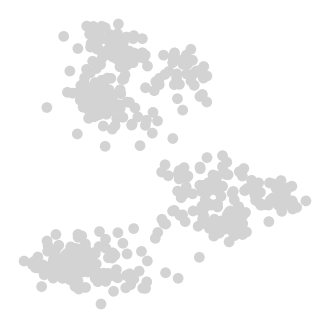

In [18]:
sc.pl.embedding(
    ad,
    basis="pca",
    frameon=False,
)

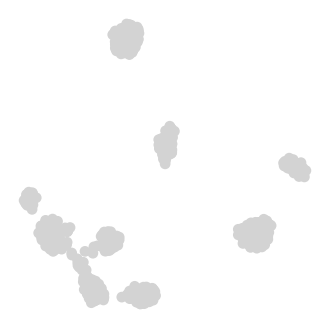

In [19]:
sc.pl.embedding(
    ad,
    basis="umap",
    frameon=False,
)

In [20]:
imputed_X = palantir.utils.run_magic_imputation(ad)

In [21]:
print(ad.var)
print(ad.var_names)
print(ad.obs_names)
print(ad.obs)

Empty DataFrame
Columns: []
Index: [COL3A1, DKK4, CXCR4, RP11-513I15.6, MIXL1, ANXA1, NODAL, DKK1, CER1, WNT3, EIF3CL, IGFBP5, ALDH1A2, PRICKLE2, SYNC, T, TDGF1, OLFML3, ABCA1, COL2A1, WNT8A, RP11-473I1.9, APLNR, RP11-267L5.1, CKB, PRKD1, CA2, GCNT4, FBN2, RGMB, AHNAK, CD44, B3GNT7, EGFLAM, LRIG3, STRA6, ALDOC, RP11-148B6.1, SNAI2, GLIPR2, TAGLN2, ACTC1, NTS, GAD1, CYP1B1, ITM2A, NNAT, PCSK1, ID2, EOMES, RP11-334J6.7, TAGLN, H3F3AP4, BMP3, KRT19, RBP1, FGF4, RP11-625I7.1, RSPO3, MSGN1, MAP1A, RP11-544M22.13, ABCG2, CD9, HSPB8, TUBB2A, FOXC2, SPOCK3, TXNDC5, ARG2, FOXF1, MFAP4, NUAK1, RP11-568A7.4, AK4, TBX15, TBRG4, AC005523.2, LINC01356, PHC1, S100A6, ENPP2, HOXA1, TOMM6, TTN, ENC1, ABHD4, TCN2, PMAIP1, DUSP6, DLL1, SLC7A3, PNP, FST, FLRT3, TNFRSF11B, TSPAN7, LGALS1, ASS1, MYBL2, ...]

[8772 rows x 0 columns]
Index(['COL3A1', 'DKK4', 'CXCR4', 'RP11-513I15.6', 'MIXL1', 'ANXA1', 'NODAL',
       'DKK1', 'CER1', 'WNT3',
       ...
       'OPRL1', 'CTD-2003C8.2', 'RP4-814D15.1', 'RP11-366M

In [22]:
# random genes
genes_to_plot = ["T", "EOMES", "RUNX2"]

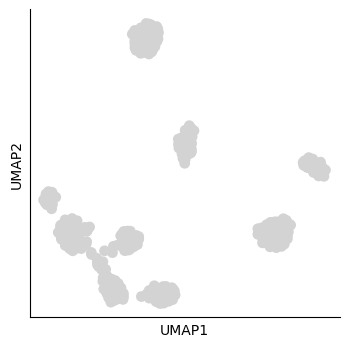

In [23]:
sc.pl.embedding(
    ad,
    basis="umap",
    layer="MAGIC_imputed_data",
#     color=genes_to_plot,
#     frameon=False,
)
plt.show()

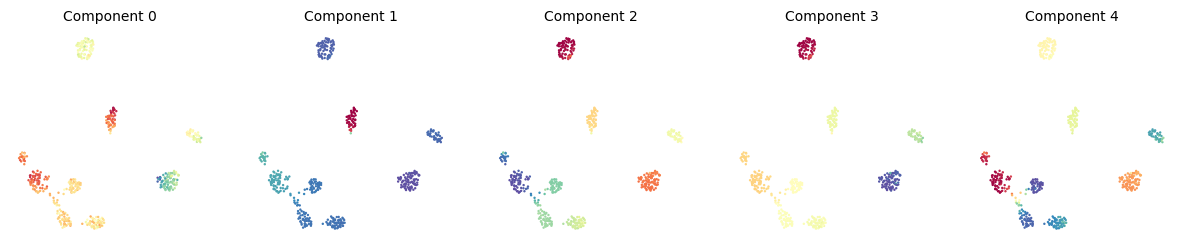

In [24]:
palantir.plot.plot_diffusion_components(ad)
plt.show()

### Extracting Start and Terminal States data from the Prior Information

In [25]:
prior_information

o{'start_milestones': ['H7hESC'], 'start_id': ['SRR3952356'], 'end_milestones': ['H7_derived_D5CntrlDrmmtm' 'H7_derived_Sclrtm' 'H7_derived_D3GARPpCrdcM'], 'end_id': ['SRR3952713' 'SRR3952690' 'SRR3952891'], 'groups_id':         cell_id                 group_id
1    SRR3952323                   H7hESC
2    SRR3952325                   H7hESC
3    SRR3952326                   H7hESC
4    SRR3952327                   H7hESC
5    SRR3952328                   H7hESC
..          ...                      ...
500  SRR3952967  H7_dreived_D2.25_Smtmrs
501  SRR3952968  H7_dreived_D2.25_Smtmrs
502  SRR3952969  H7_dreived_D2.25_Smtmrs
503  SRR3952970  H7_dreived_D2.25_Smtmrs
504  SRR3952971  H7_dreived_D2.25_Smtmrs

[504 rows x 2 columns], 'groups_network':                       from                        to
1                   H7hESC            H7_derived_APS
2                   H7hESC            H7_derived_MPS
3           H7_derived_APS       H7_derived_DLL1pPXM
4      H7_derived_DLL1pPXM   H7_

In [26]:
terminal_states = pd.Series(
    ["H7_derived_D5CntrlDrmmtm", "H7_derived_Sclrtm", "H7_derived_D3GARPpCrdcM"],
    index=["SRR3952713", "SRR3952690", "SRR3952891"],
)
start_cell = "SRR3952356"
start_states = pd.Series(['H7hESC'],index=['SRR3952356'])

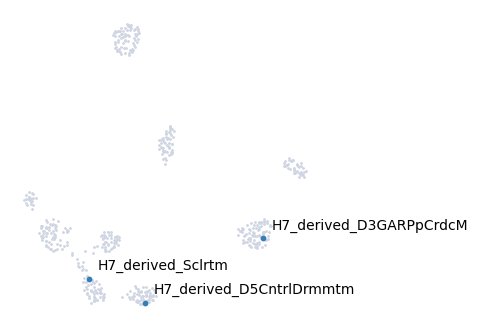

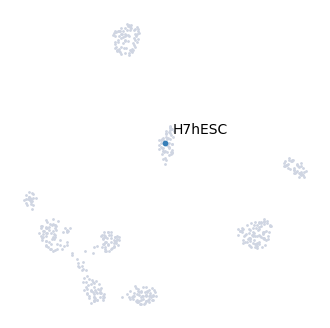

In [27]:
palantir.plot.highlight_cells_on_umap(ad, terminal_states)
palantir.plot.highlight_cells_on_umap(ad, start_states)
plt.show()

In [28]:
%%R
str(data$prior)

List of 12
 $ start_milestones     : chr "H7hESC"
 $ start_id             : chr "SRR3952356"
 $ end_milestones       : chr [1:3] "H7_derived_D5CntrlDrmmtm" "H7_derived_Sclrtm" "H7_derived_D3GARPpCrdcM"
 $ end_id               : chr [1:3] "SRR3952713" "SRR3952690" "SRR3952891"
 $ groups_id            :Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	504 obs. of  2 variables:
  ..$ cell_id : chr [1:504] "SRR3952323" "SRR3952325" "SRR3952326" "SRR3952327" ...
  ..$ group_id: chr [1:504] "H7hESC" "H7hESC" "H7hESC" "H7hESC" ...
 $ groups_network       :Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	9 obs. of  2 variables:
  ..$ from: chr [1:9] "H7hESC" "H7hESC" "H7_derived_APS" "H7_derived_DLL1pPXM" ...
  ..$ to  : chr [1:9] "H7_derived_APS" "H7_derived_MPS" "H7_derived_DLL1pPXM" "H7_dreived_D2.25_Smtmrs" ...
 $ features_id          : chr [1:6195] "NODAL" "T" "TWIST1" "HAND1" ...
 $ groups_n             : int 9
 $ timecourse_continuous: Named num [1:504] 0 0 0 0 0 0 0 0 0 0 ...
  ..- attr(*, "names")= 

# Palantir Results

In [29]:
pr_res = palantir.core.run_palantir(
    ad, start_cell, num_waypoints=500, terminal_states=terminal_states
)

Sampling and flocking waypoints...
Time for determining waypoints: 0.0005783200263977051 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...


/opt/micromamba/lib/python3.10/site-packages/palantir/core.py:558: UserWarning: Some of the cells were unreachable. Consider increasing the k for 
             nearest neighbor graph construction.
  warnings.warn(


Time for shortest paths: 0.1125344475110372 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


/opt/micromamba/lib/python3.10/site-packages/scipy/stats/_entropy.py:133: RuntimeWarning: invalid value encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


### Pseudotime plot

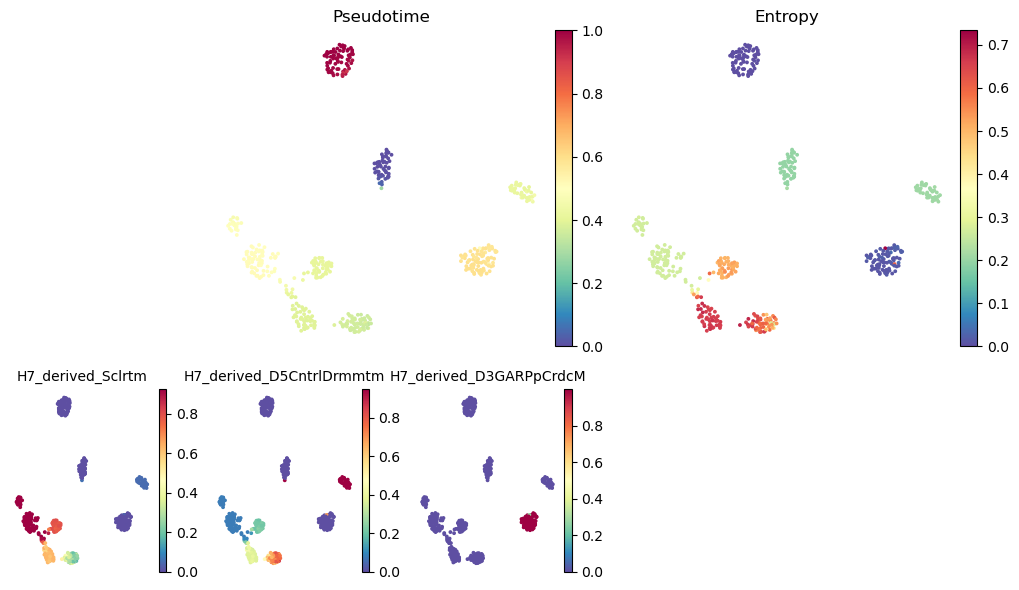

In [30]:
palantir.plot.plot_palantir_results(ad, s=3)
plt.show()

### Probability that the cell will reach each terminal state

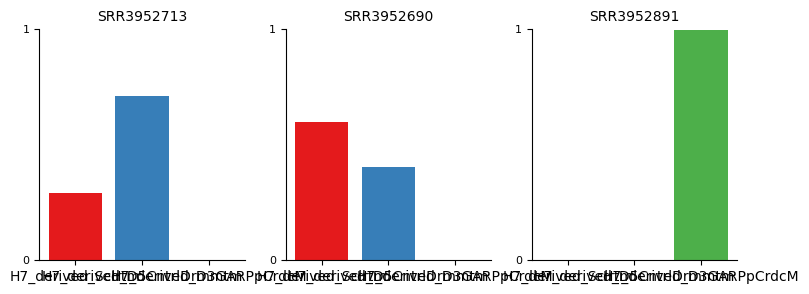

In [31]:
cells = [
    "SRR3952713", "SRR3952690", "SRR3952891"
]
palantir.plot.plot_terminal_state_probs(ad, cells)
plt.show()

### Classifying cells for each branch in the trajectory

In [32]:
masks = palantir.presults.select_branch_cells(ad, q=.01, eps=.01)

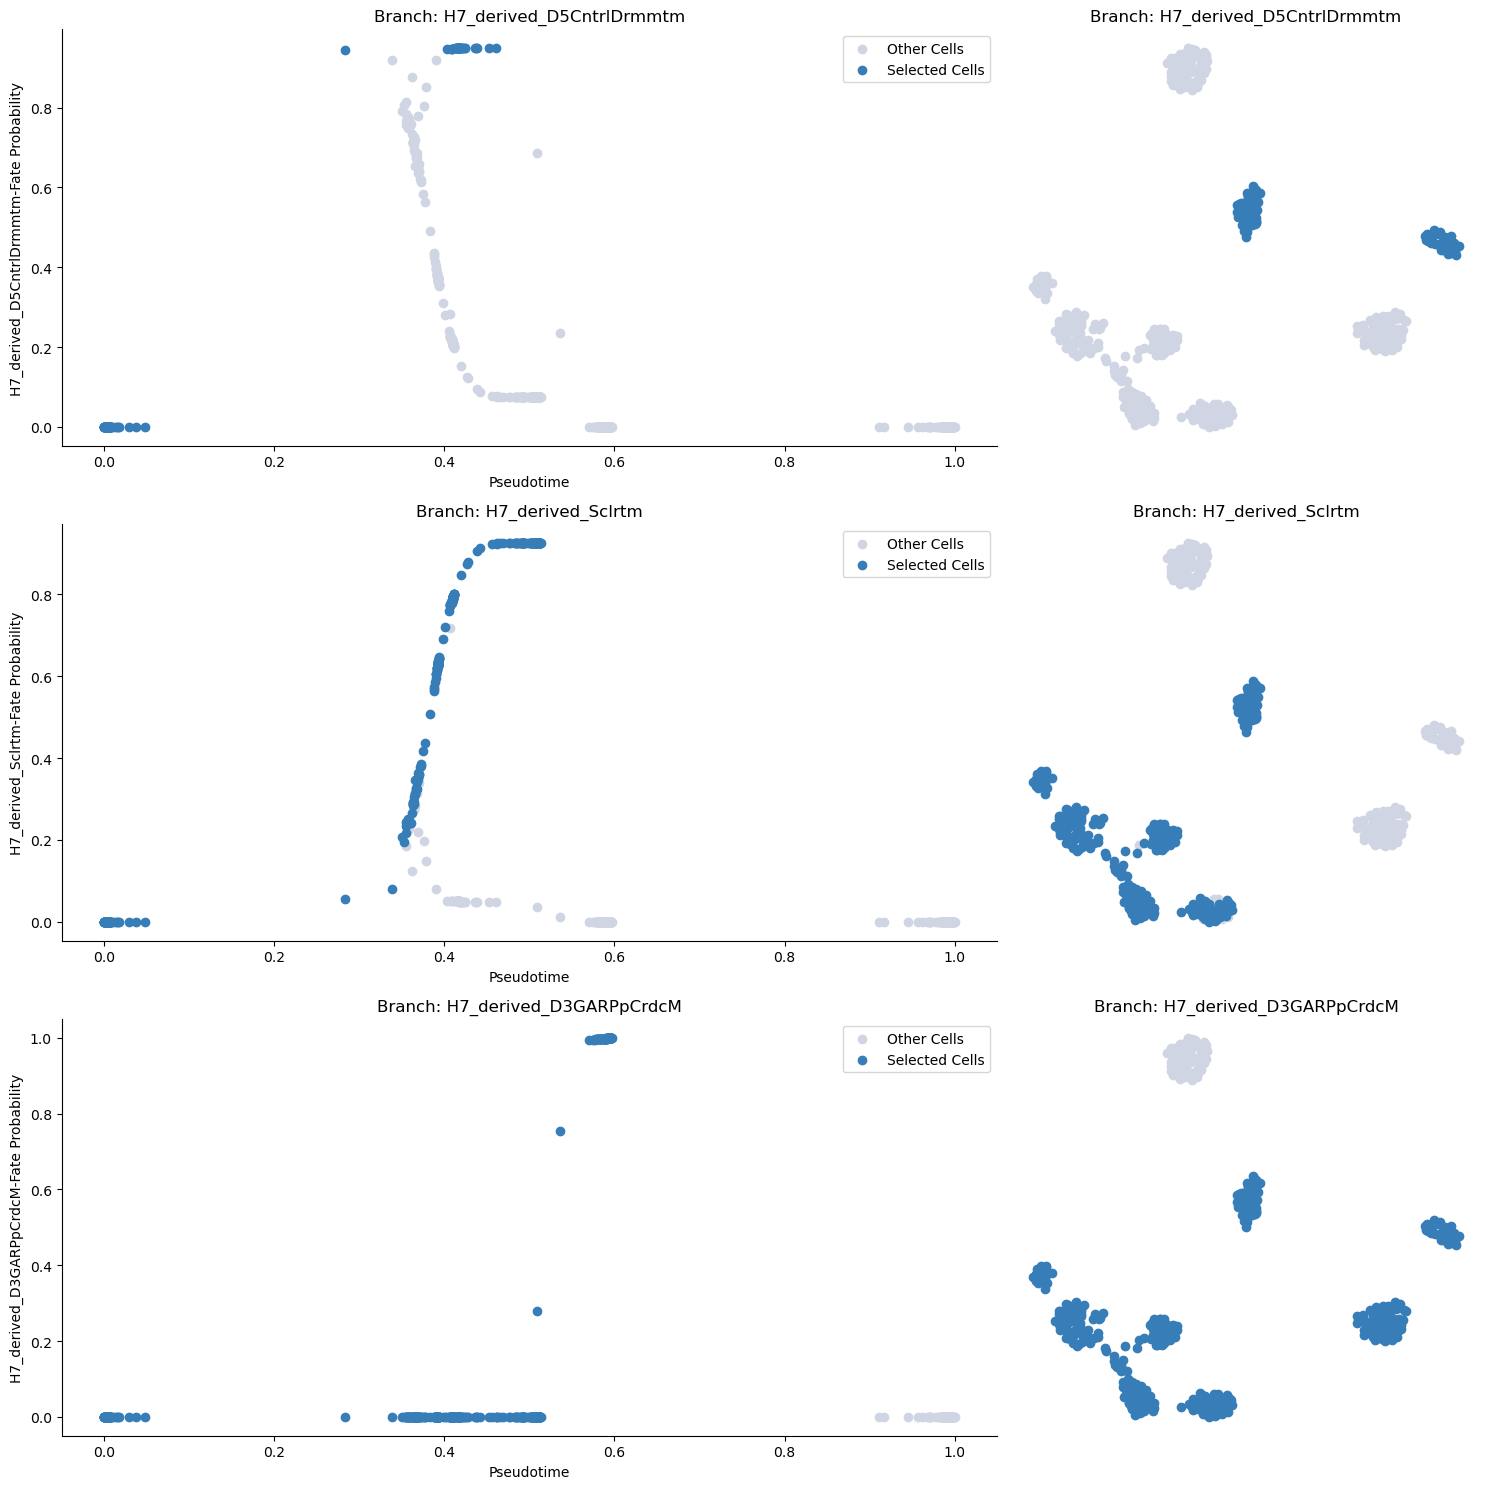

In [33]:
palantir.plot.plot_branch_selection(ad)
plt.show()

### Trajectory branches for the 3 given terminal states

/tmp/ipykernel_188/2090162182.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  terminal_colors = plt.cm.get_cmap('tab10', len(terminal_states))


[2025-02-17 16:24:11,767] [INFO    ] Using sparse Gaussian Process since n_landmarks (50) < n_samples (431) and rank = 1.0.
[2025-02-17 16:24:11,768] [INFO    ] Using covariance function Matern52(ls=1.7360177993774415).
[2025-02-17 16:24:11,802] [INFO    ] Computing 50 landmarks with k-means clustering.
[2025-02-17 16:24:12,904] [INFO    ] Sigma interpreted as element-wise standard deviation.
[2025-02-17 16:24:13,773] [INFO    ] Using sparse Gaussian Process since n_landmarks (50) < n_samples (286) and rank = 1.0.
[2025-02-17 16:24:13,774] [INFO    ] Using covariance function Matern52(ls=1.7360177993774415).
[2025-02-17 16:24:13,800] [INFO    ] Computing 50 landmarks with k-means clustering.
[2025-02-17 16:24:14,514] [INFO    ] Sigma interpreted as element-wise standard deviation.
[2025-02-17 16:24:14,648] [INFO    ] Using sparse Gaussian Process since n_landmarks (50) < n_samples (94) and rank = 1.0.
[2025-02-17 16:24:14,649] [INFO    ] Using covariance function Matern52(ls=1.73601779

/tmp/ipykernel_188/2090162182.py:35: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


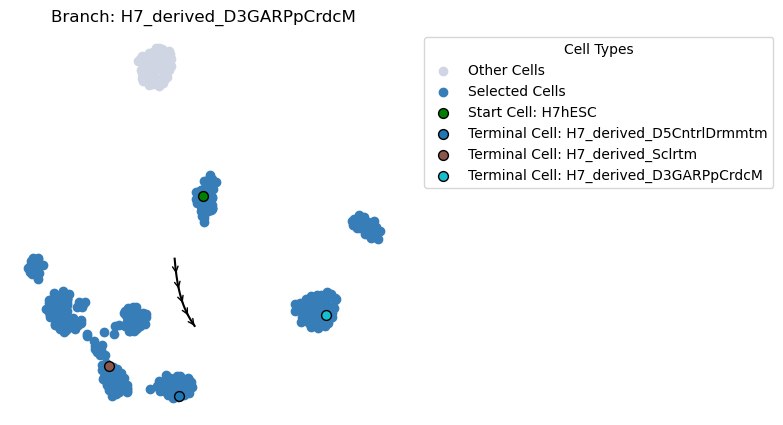

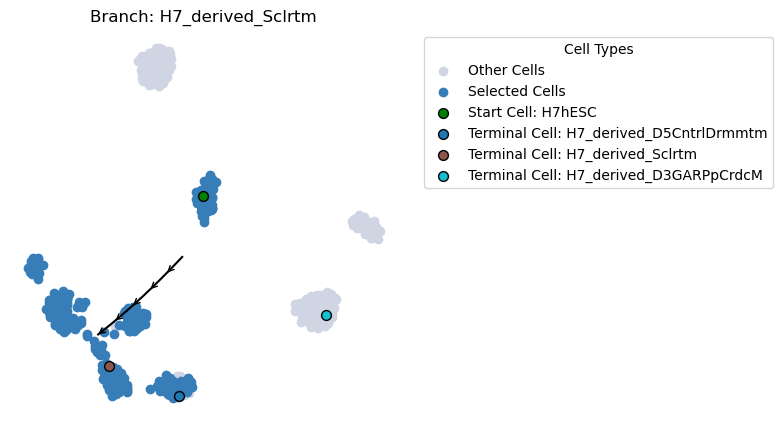

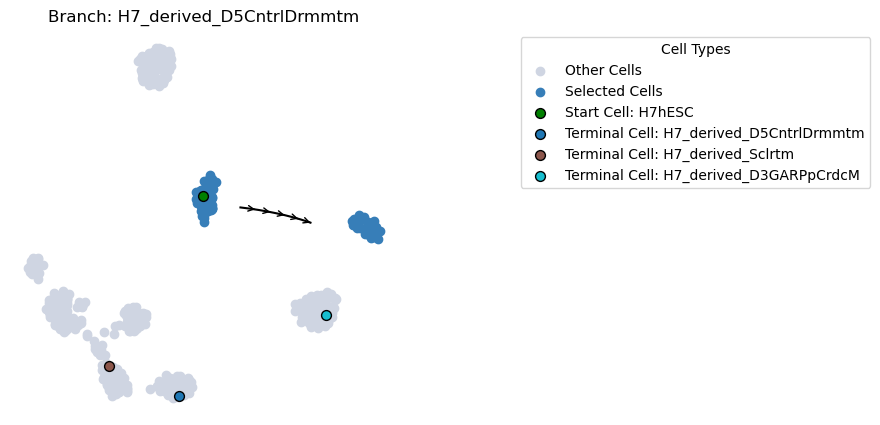

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

umap_df = pd.DataFrame(
    ad.obsm["X_umap"],
    index=ad.obs_names, 
    columns=["UMAP1", "UMAP2"]
)
start_coords = umap_df.loc[start_states.index]
terminal_coords = umap_df.loc[terminal_states.index]
terminal_colors = plt.cm.get_cmap('tab10', len(terminal_states))

bb=[1.05,1.05,1.30]
terminal_cells=["H7_derived_D3GARPpCrdcM", "H7_derived_Sclrtm", "H7_derived_D5CntrlDrmmtm"]
for j in range(3):
    
    palantir.plot.plot_trajectory(ad, terminal_cells[j])

    plt.scatter(
        start_coords["UMAP1"], start_coords["UMAP2"],
        color="green", label=f"Start Cell: {list(start_states.values)[0]}", s=50, edgecolor="black"
    )

    for i, (cell, color) in enumerate(zip(terminal_states.index, terminal_colors.colors)):
        plt.scatter(
            terminal_coords.loc[cell, "UMAP1"], 
            terminal_coords.loc[cell, "UMAP2"], 
            color=color, 
            label=f"Terminal Cell: {terminal_states[cell]}", 
            s=50, edgecolor="black"
        )
    plt.legend(loc="upper left", bbox_to_anchor=(bb[j], 1), title="Cell Types")

plt.tight_layout()

plt.show()


### (Yet to fix : the plots above show irregularities probably due to incorrect terminal cells or UMAP projection, since the PCA projection looks much smoother and the trajectories are much clearer with Slingshot)

In [35]:
gene_trends = palantir.presults.compute_gene_trends(
    ad,
    expression_key="MAGIC_imputed_data",
)

H7_derived_Sclrtm
[2025-02-17 16:24:15,776] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (500) >= n_samples (286) and rank = 1.0.
[2025-02-17 16:24:15,777] [INFO    ] Using covariance function Matern52(ls=1.0).
[2025-02-17 16:24:16,988] [INFO    ] Sigma interpreted as element-wise standard deviation.
H7_derived_D5CntrlDrmmtm
[2025-02-17 16:24:18,751] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (500) >= n_samples (94) and rank = 1.0.
[2025-02-17 16:24:18,752] [INFO    ] Using covariance function Matern52(ls=1.0).
[2025-02-17 16:24:19,202] [INFO    ] Sigma interpreted as element-wise standard deviation.
H7_derived_D3GARPpCrdcM
[2025-02-17 16:24:20,551] [INFO    ] Using non-sparse Gaussian Process since n_landmarks (500) >= n_samples (431) and rank = 1.0.
[2025-02-17 16:24:20,552] [INFO    ] Using covariance function Matern52(ls=1.0).
[2025-02-17 16:24:21,033] [INFO    ] Sigma interpreted as element-wise standard deviation.


In [36]:
ad.var_names

Index(['COL3A1', 'DKK4', 'CXCR4', 'RP11-513I15.6', 'MIXL1', 'ANXA1', 'NODAL',
       'DKK1', 'CER1', 'WNT3',
       ...
       'OPRL1', 'CTD-2003C8.2', 'RP4-814D15.1', 'RP11-366M4.6', 'LHX6',
       'NBEAP3', 'HLCS-IT1', 'RP11-44F14.5', 'AC073257.2', 'RP1-28C20.1'],
      dtype='object', length=8772)

### Gene expression vs Pseudotime for 3 random genes

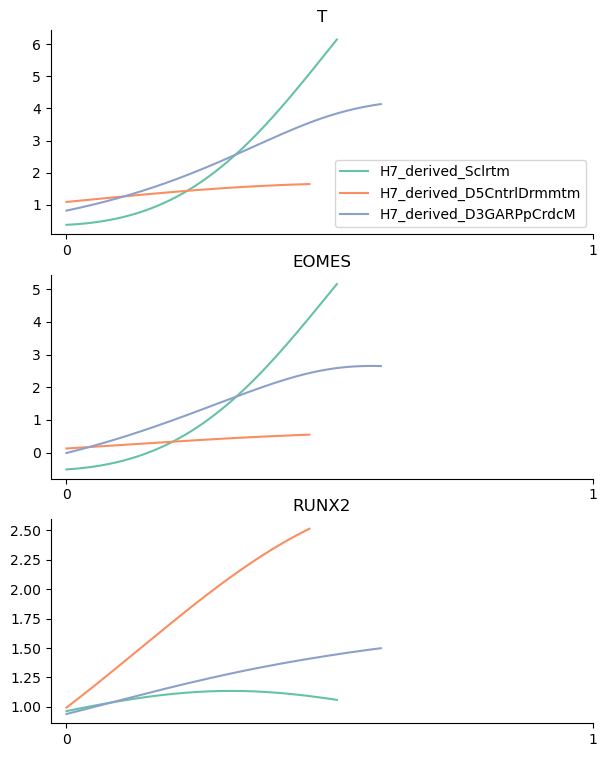

In [37]:
palantir.plot.plot_gene_trends(ad, genes_to_plot)
plt.show()

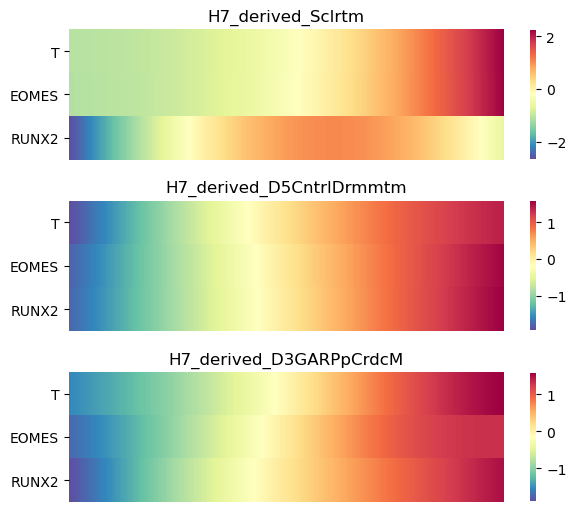

In [38]:
palantir.plot.plot_gene_trend_heatmaps(ad, genes_to_plot)
plt.show()

In [39]:
more_genes = ad.var_names[:1000]
communities = palantir.presults.cluster_gene_trends(ad, "H7_derived_Sclrtm", more_genes)

/opt/micromamba/lib/python3.10/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/micromamba/lib/python3.10/site-packages/palantir/presults.py:481: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(gt_ad, **kwargs)


### Clusters of genes with similar expression trends over the pseudotime

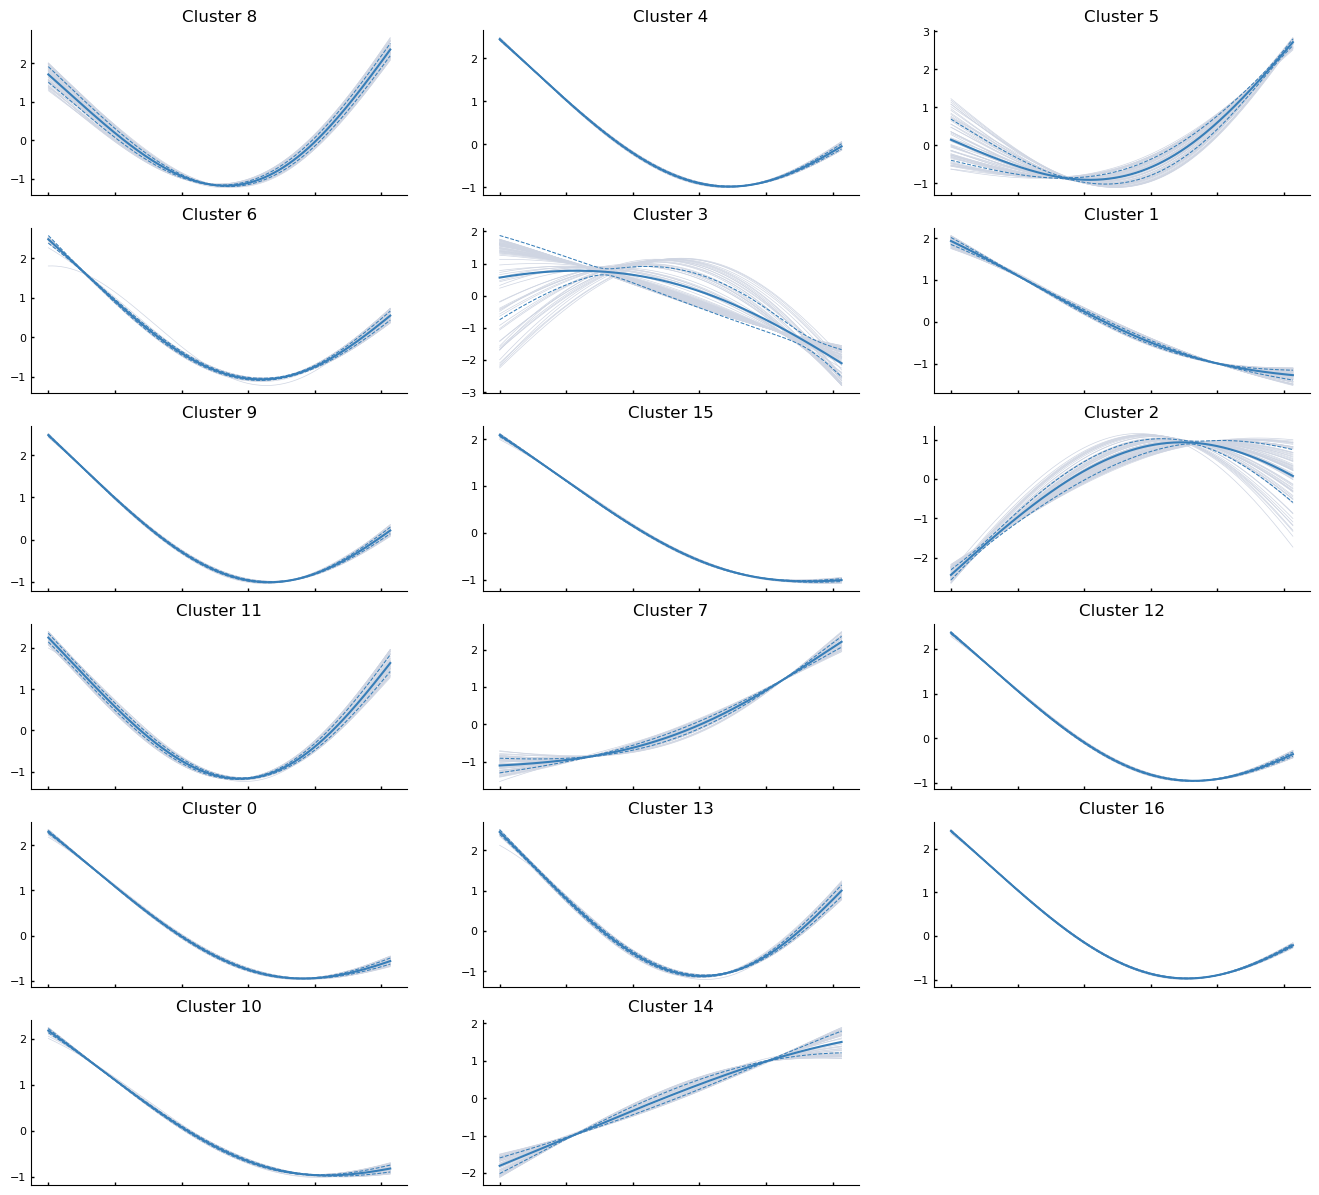

In [40]:
palantir.plot.plot_gene_trend_clusters(ad, "H7_derived_Sclrtm")
plt.show()

# Reference trajectory from the dataset

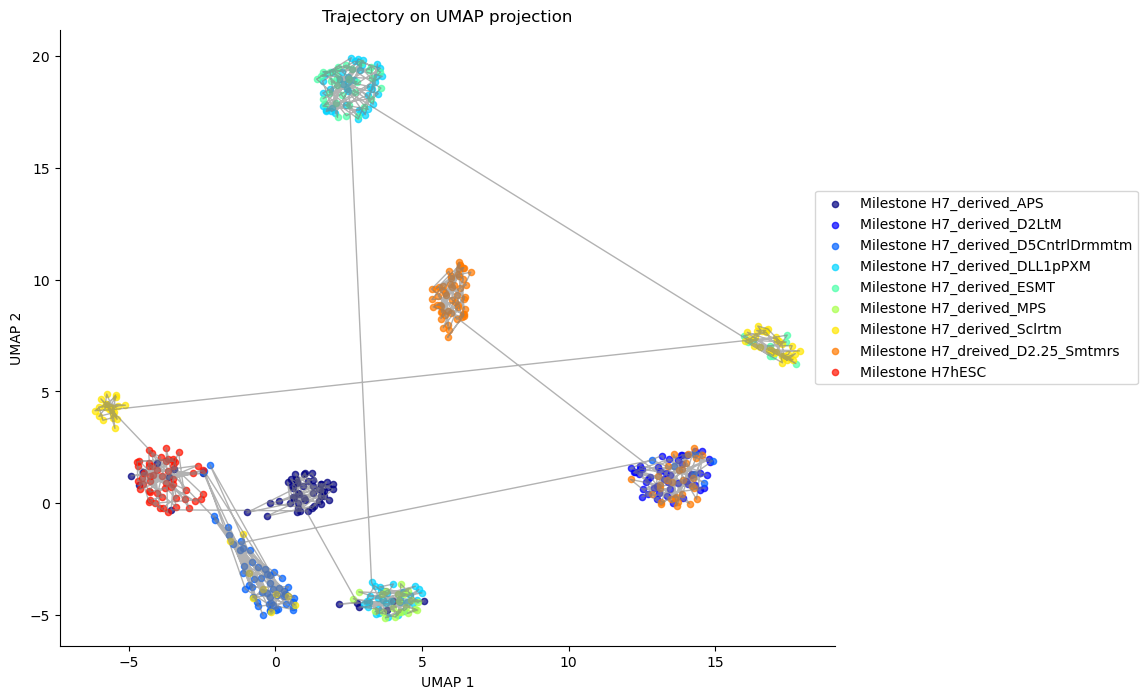

In [41]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np

sc.pp.neighbors(ad)  
sc.tl.umap(ad)      

umap_coords = ad.obsm['X_umap']

milestone_ids = ad.uns['cell_info']['milestone_id'].astype(str) 

sorted_idx = np.argsort(milestone_ids)
ordered_umap_coords = umap_coords[sorted_idx]

plt.figure(figsize=(10, 8))

plt.plot(ordered_umap_coords[:, 0], ordered_umap_coords[:, 1], 
         color='grey', alpha=0.6, linewidth=1)

milestone_colors = {milestone: plt.cm.jet(i / len(np.unique(milestone_ids))) 
                    for i, milestone in enumerate(np.unique(milestone_ids))}

for milestone in np.unique(milestone_ids):
    cells = milestone_ids == milestone
    plt.scatter(ordered_umap_coords[cells, 0], ordered_umap_coords[cells, 1], 
                label=f'Milestone {milestone}', 
                color=milestone_colors[milestone], alpha=0.7, s=20)

plt.title("Trajectory on UMAP projection")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(bbox_to_anchor=(0.9,0.5,0.5,0.25))
plt.show()
